In [2]:
#libs <- c("data.table", "tidyverse", "dlpyr", "ggpubr", "glmnet","caret","factoextra","Metrics","
#readr","gplots","ROCR","readxl","e1071","ggplot2","reshape2","gridExtra","ggcorrplot")

#####have to install "SciencesPo" - separately tar.gz #####

#for(i in libs) {

#install.packages(i)
#}


library(base)
library(data.table)
library(tidyverse)
library(dplyr)
#library(devtools)
#library(car)
library(ggpubr)
library(glmnet)
#library(summarytools)
#library(knitr)
#library(htmltools)
#library(corrplot)
library(caret)
library(factoextra)
library(Metrics)
library(readr)
library(gplots)
library(dplyr)
#library(stringr)
library(ROCR)
library(readxl)
library(e1071)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggcorrplot)
library(SciencesPo)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()
Warning message:
“package ‘ggpubr’ was built under R version 3.5.2”Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required pa

In [6]:
X_data_numeric2 <- read_csv("/Users/laura/FinalDatasetPS14.csv")  #### change this


X_data_numeric <- X_data_numeric2[,-c(dim(X_data_numeric2)[2])]


Names <- names(X_data_numeric)

X_data_numeric  <- data.frame(apply(X_data_numeric, 2, as.numeric))

table(is.na(X_data_numeric))


for(i in 1:ncol(X_data_numeric)){
  X_data_numeric[is.na(X_data_numeric[,i]), i] <- min(data.matrix(X_data_numeric[,i]), na.rm = TRUE)
    #or median
}

NAscol1 <- data.frame(colSums(is.na(X_data_numeric)))


X_data_scaled <-data.frame(scale(X_data_numeric))


All2 <- data.frame(X_data_scaled, as.factor(X_data_numeric2$Label))
names(All2) <- c(Names,"Label")

print("Final normalized and imputed dataset ")
head(All2)

table(is.na(All2))



Parsed with column specification:
cols(
  .default = col_integer(),
  PS14 = col_double(),
  `WBC [109/L]_T1` = col_double(),
  `NEUT [109/L]_T1` = col_double(),
  `LYMPH [109/L]_T1` = col_double(),
  `MONO [109/L]_T1` = col_double(),
  `IG [109/L]_T1` = col_double(),
  `NEUT %_T1` = col_double(),
  `LYMPH %_T1` = col_double(),
  `MONO %_T1` = col_double(),
  `IG %_T1` = col_double(),
  `Increase_CD11b + fMLF (MedFI)_T1` = col_double(),
  `Decrease_CD62L + FMLF (MedFI)_T1` = col_double(),
  `% CD16BRIGHT CD62LDIM_T1` = col_double(),
  `CD16BRIGHT CD62LDIM [106/L]_T1` = col_double(),
  `% CD14+ 16-_T1` = col_double(),
  `% CD14+ 16+_T1` = col_double(),
  `% CD14+ HLA-DRLow/Neg_T1` = col_double(),
  `CD14+ HLA-DRLow/Neg (x106/L)_T1` = col_double(),
  `IL1-Ra_T1` = col_double(),
  `IL-6_T1` = col_double()
  # ... with 58 more columns
)
See spec(...) for full column specifications.



FALSE  TRUE 
10319  1637 

[1] "Final normalized and imputed dataset "


ISS        NISS       PS14      Age         WBC [109/L]_T1 NEUT [109/L]_T1
1 -1.0464636 -1.3838429 0.6694777  0.02292171  2.1290636      2.8295744     
2 -1.1791752 -0.8027674 0.7725172 -0.96101381 -0.9361674     -0.8048849     
3 -0.8473962 -1.0668926 0.7511861  0.33363819 -0.7715913     -0.7413741     
4 -1.5109542 -1.3310178 0.7834649 -0.13243653 -0.3772942     -0.3623578     
5 -0.1838382 -0.1688669 0.2418910  1.93900666  0.6324491      0.8894205     
6 -1.1128194 -1.3838429 0.7344444 -0.44315301 -1.0287415     -0.9667352     
  LYMPH [109/L]_T1 MONO [109/L]_T1 IG [109/L]_T1 NEUT %_T1   ⋯ Eff_Mem_Cyto_T3
1 -1.3981345        3.7586484      -0.4697766     1.92180514 ⋯  0.4253299     
2 -0.4411996       -1.1094699      -0.7030714    -0.34092735 ⋯ -0.4511945     
3 -0.3420354       -0.8498369      -0.2364818    -0.47120589 ⋯ -0.9576309     
4 -0.1189158       -0.4171153      -0.5086591    -0.04608645 ⋯ -0.3538029     
5 -0.4759071        0.5565084       0.6189323     1.08527979 ⋯  0.2110684     
6 -0.4213667       -0.6767482      -0.1198345    -0.80718738 ⋯ -0.5680645     
  IL1-Ra_T3  IL-6_T3    IL-8_T3      IL-10_T3    G-CSF_T3   MCP-1_T3  
1 -0.4717103 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585
2 -0.1280406 -0.2938123  0.073726841  0.01478357 -0.1414413 -0.4152482
3 -0.2352173 -0.3715281 -0.005590231  0.43054469 -0.1531610 -0.4272585
4  2.4639616  2.1731424  1.329943099  7.57598291  0.4075845  2.2686327
5 -0.4717103 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585
6 -0.3879266 -0.3690971 -0.431449718 -0.16970279 -0.3010821 -0.3147455
  TNF-A_T3    Cortisol (ng/ml)_T3 Label
1 -0.30944049  0.2192912          N    
2 -0.21377984 -0.3116227          Y    
3 -0.01629675  0.2249514          N    
4  5.14876658  0.3775903          N    
5 -0.30944049  1.1099962          Y    
6 -0.18519963 -0.2967703          N


FALSE  TRUE 
11956    61 

In [9]:

names(All2)
All2["ID"] <- row.names(All2)
#CF_ISS_1 <- All2[,c(197, 196, grep("_T1", colnames(All2)),3,4)]
CF_ISS_1 <- All2[,c(197, grep("_T1", colnames(All2)),2,4)]


head(CF_ISS_1)
CF_ISS_2 <- All2[,c(197, grep("_T2", colnames(All2)),2,4)]
head(CF_ISS_2)
CF_ISS_3 <- All2[,c(197, grep("_T3", colnames(All2)),2,4)]
head(CF_ISS_3)

#Data1 <- melt(cbind(CF_ISS_1[,-1], Time ="T1"))
Data1 <- melt(cbind(CF_ISS_1, Time ="T1"))
Data2 <- melt(cbind(CF_ISS_2, Time ="T2"))
Data3 <- melt(cbind(CF_ISS_3, Time ="T3"))

head(Data1)
All <- list(Data1,Data2,Data3)
All3 <- do.call("rbind", All)

All3$variable <- gsub("_T[0-9]$", "", All3$variable)

All4 <- data.frame(sapply( All3[,1:3], as.factor ), value=All3[,4])

length(levels(All4$variable))

levels(All4$Time) <- c("T<1h","4<T<12h","48<T<72h")
levels(All4$Label) <- c("No MODS","Yes MODS")


#pdf("/Users/laura/Desktop/FinalPaper/GridAllVariablesFinalT1NISS.pdf",width=30, height=40)

options(repr.plot.width = 60, repr.plot.height = 70)

ggplot(All4, aes(x=Time, y=value, fill=Label))+geom_boxplot(position=position_dodge(0.8))+
  geom_dotplot(binaxis='y', stackdir='center',position=position_dodge(0.8),stackratio=0.6, dotsize=0.6)+facet_wrap(. ~ variable,ncol=6,scale="free")

#table(is.na(All4$value))
#graphics.off()




[1] "ISS"                              "NISS"                            
  [3] "PS14"                             "Age"                             
  [5] "WBC [109/L]_T1"                   "NEUT [109/L]_T1"                 
  [7] "LYMPH [109/L]_T1"                 "MONO [109/L]_T1"                 
  [9] "IG [109/L]_T1"                    "NEUT %_T1"                       
 [11] "LYMPH %_T1"                       "MONO %_T1"                       
 [13] "IG %_T1"                          "ROS TO PMA (%)_T1"               
 [15] "ROS TO PMA (MFI)_T1"              "CD62L (MedFI)_T1"                
 [17] "CD88 (MedFI)_T1"                  "CD16 (MedFI)...23_T1"            
 [19] "CD11B (MedFI)_T1"                 "CXCR1 (MedFI)_T1"                
 [21] "CXCR2 (MedFI)_T1"                 "CD11B + FMLF (MedFI)_T1"         
 [23] "Increase_CD11b + fMLF (MedFI)_T1" "CD63 (MedFI)_T1"                 
 [25] "CD62L + FMLF (MedFI)_T1"          "Decrease_CD62L + FMLF (MedFI)_T1"
 [27] "% CD16BRIGHT CD62LDIM_T1"         "CD16BRIGHT CD62LDIM [106/L]_T1"  
 [29] "CD16 % +ve_T1"                    "CD16 (MedFI)...35_T1"            
 [31] "% CD14+ 16-_T1"                   "% CD14+ 16+_T1"                  
 [33] "CD14+ 16- (x106/L)_T1"            "CD14+ 16+ (x106/L)_T1"           
 [35] "% HLA-DR +ve_T1"                  "HLA-DR (MedFI)_T1"               
 [37] "% CD14+ HLA-DRLow/Neg_T1"         "CD14+ HLA-DRLow/Neg (x106/L)_T1" 
 [39] "% TLR4 +ve_T1"                    "TLR4 (MedFI)_T1"                 
 [41] "% TLR2 +ve_T1"                    "TLR2 (MedFI)_T1"                 
 [43] "% CD86 +ve_T1"                    "CD86 (MedFI)_T1"                 
 [45] "B cells (x106/L)_T1"              "NK cells (x106/L)_T1"            
 [47] "CD56DIM NK cells (x106/L)_T1"     "CD56BRIGHT NK cells (x106/L)_T1" 
 [49] "NKT cells (x106/L)_T1"            "CD3+ (106/L)_T1"                 
 [51] "CD3+ 4+ (106/L)_T1"               "Term_Helper_T1"                  
 [53] "Naive_Helper_T1"                  "Central_Mem_Helper_T1"           
 [55] "Eff_Mem_Helper_T1"                "CD3+ 8+ (106/L)_T1"              
 [57] "Term_Cyto_T1"                     "Naive_Cyto_T1"                   
 [59] "Central_Mem_Cyto_T1"              "Eff_Mem_Cyto_T1"                 
 [61] "IL1-Ra_T1"                        "IL-6_T1"                         
 [63] "IL-8_T1"                          "IL-10_T1"                        
 [65] "G-CSF_T1"                         "MCP-1_T1"                        
 [67] "TNF-A_T1"                         "Cortisol (ng/ml)_T1"             
 [69] "WBC [109/L]_T2"                   "NEUT [109/L]_T2"                 
 [71] "LYMPH [109/L]_T2"                 "MONO [109/L]_T2"                 
 [73] "IG [109/L]_T2"                    "NEUT %_T2"                       
 [75] "LYMPH %_T2"                       "MONO %_T2"                       
 [77] "IG %_T2"                          "ROS TO PMA (%)_T2"               
 [79] "ROS TO PMA (MFI)_T2"              "CD62L (MedFI)_T2"                
 [81] "CD88 (MedFI)_T2"                  "CD16 (MedFI)...15_T2"            
 [83] "CD11B (MedFI)_T2"                 "CXCR1 (MedFI)_T2"                
 [85] "CXCR2 (MedFI)_T2"                 "CD11B + FMLF (MedFI)_T2"         
 [87] "Increase_CD11b + fMLF (MedFI)_T2" "CD63 (MedFI)_T2"                 
 [89] "CD62L + FMLF (MedFI)_T2"          "Decrease_CD62L + FMLF (MedFI)_T2"
 [91] "% CD16BRIGHT CD62LDIM_T2"         "CD16BRIGHT CD62LDIM [106/L]_T2"  
 [93] "CD16 % +ve_T2"                    "CD16 (MedFI)...27_T2"            
 [95] "% CD14+ 16-_T2"                   "% CD14+ 16+_T2"                  
 [97] "CD14+ 16- (x106/L)_T2"            "CD14+ 16+ (x106/L)_T2"           
 [99] "% HLA-DR +ve_T2"                  "HLA-DR (MedFI)_T2"               
[101] "% CD14+ HLA-DRLow/Neg_T2"         "CD14+ HLA-DRLow/Neg (x106/L)_T2" 
[103] "% TLR4 +ve_T2"                    "TLR4 (MedFI)_T2"                 
[105] "% TLR2 +ve_T2"                    "TLR2 (Me

Label WBC [109/L]_T1 NEUT [109/L]_T1 LYMPH [109/L]_T1 MONO [109/L]_T1
1 N      2.1290636      2.8295744      -1.3981345        3.7586484     
2 Y     -0.9361674     -0.8048849      -0.4411996       -1.1094699     
3 N     -0.7715913     -0.7413741      -0.3420354       -0.8498369     
4 N     -0.3772942     -0.3623578      -0.1189158       -0.4171153     
5 Y      0.6324491      0.8894205      -0.4759071        0.5565084     
6 N     -1.0287415     -0.9667352      -0.4213667       -0.6767482     
  IG [109/L]_T1 NEUT %_T1   LYMPH %_T1 MONO %_T1   IG %_T1    ⋯ IL1-Ra_T1 
1 -0.4697766     1.92180514 -1.9646994  1.60389375 -0.7382046 ⋯ -0.6555436
2 -0.7030714    -0.34092735  0.6428371 -1.02732594 -0.6653398 ⋯ -0.4860120
3 -0.2364818    -0.47120589  0.4785266 -0.58878932  0.2090385 ⋯  0.5864570
4 -0.5086591    -0.04608645  0.1856252 -0.28181369 -0.4467452 ⋯  4.2426929
5  0.6189323     1.08527979 -0.9859802  0.02516194  0.5733628 ⋯ -0.6555436
6 -0.1198345    -0.80718738  0.8928748  0.33213757  0.7919574 ⋯ -0.4775580
  IL-6_T1    IL-8_T1     IL-10_T1   G-CSF_T1   MCP-1_T1   TNF-A_T1   
1 -0.2849531 -0.81117209 -0.2509364 -0.8472419 -0.3043184 -0.24060528
2 -0.2581294 -0.04104194 -0.1591458 -0.1399434 -0.3043184 -0.14986589
3 -0.1614463  0.56170019  2.5955319  0.7639996 -0.3043184 -0.08956195
4  1.8928255  0.23745397  7.0697487  0.1738717  0.9064989  2.97898076
5 -0.2849531 -0.81117209 -0.2509364 -0.8472419 -0.3043184 -0.24060528
6 -0.2657442 -0.15650700 -0.2106472 -0.6259197 -0.2358723 -0.12205908
  Cortisol (ng/ml)_T1 NISS       Age        
1  5.6068853          -1.3838429  0.02292171
2 -1.0187879          -0.8027674 -0.96101381
3 -0.1310734          -1.0668926  0.33363819
4 -1.0161972          -1.3310178 -0.13243653
5  0.1657853          -0.1688669  1.93900666
6  0.2171129          -1.3838429 -0.44315301

Label WBC [109/L]_T2 NEUT [109/L]_T2 LYMPH [109/L]_T2 MONO [109/L]_T2
1 N     -0.32946839    -0.5688688       1.3760701        0.7734891     
2 Y     -1.26697241    -1.2376316      -0.3359982       -1.0651847     
3 N     -1.00458061    -1.0403165       0.3520292       -0.9289866     
4 N      2.35048116     2.3953770       1.2480650        0.6917703     
5 Y      0.42627465     0.3047402       0.4960350        1.1003644     
6 N      0.06138606     0.1872548      -1.0400262       -0.1526577     
  IG [109/L]_T2 NEUT %_T2  LYMPH %_T2    MONO %_T2  IG %_T2    ⋯ IL1-Ra_T2  
1 -0.48170260   -1.7462229  1.5104420938  1.8793065 -0.4854820 ⋯ -0.39931950
2 -0.77234700   -0.3976490  1.0826003972 -0.4126571 -0.7243078 ⋯  1.15783264
3 -0.69968590   -0.8235144  1.5607764111 -0.4916903 -0.7243078 ⋯ -0.37683439
4  2.42474143    0.8089698 -0.4022619616 -0.8473398  1.6639504 ⋯  0.03019262
5  0.60821391   -0.3444158  0.0004125764  1.0889742  0.9474730 ⋯ -0.39931950
6  0.09958621    1.0219026 -1.0314409272 -0.2941072  0.4698213 ⋯ -0.22000584
  IL-6_T2    IL-8_T2    IL-10_T2   G-CSF_T2   MCP-1_T2   TNF-A_T2  
1 -0.4199804 -0.7927685 -0.2736553 -0.4878970 -0.3814485 -0.2789843
2  5.4340971  4.1852750  0.2270977  5.2765658  0.6052724 -0.1635290
3 -0.3125190  0.1374466  0.4579186 -0.3551332 -0.3814485 -0.1491016
4  0.5567597 -0.1007752  7.3724390 -0.4282566  1.2444336  4.5572539
5 -0.4199804 -0.7927685 -0.2736553 -0.4878970 -0.3814485 -0.2789843
6 -0.3523851 -0.4955984  0.2089305 -0.3971044 -0.2433791 -0.1900341
  Cortisol (ng/ml)_T2 NISS       Age        
1  0.66386554         -1.3838429  0.02292171
2 -0.34415675         -0.8027674 -0.96101381
3 -0.91091725         -1.0668926  0.33363819
4 -0.50941826         -1.3310178 -0.13243653
5  1.64061669         -0.1688669  1.93900666
6  0.04553795         -1.3838429 -0.44315301

Label WBC [109/L]_T3 NEUT [109/L]_T3 LYMPH [109/L]_T3 MONO [109/L]_T3
1 N      0.74367283     0.5736523       1.56976241       1.23396451    
2 Y     -0.06274253    -0.0338377      -0.32517018      -0.17962417    
3 N     -0.16990133    -0.1557289      -0.07380157      -0.13865058    
4 N     -0.90729916    -0.8143346      -1.04060391      -0.24108454    
5 Y      0.17155382     0.1843869       0.08088680       0.08670414    
6 N     -0.48774522    -0.4486610      -0.36384227      -0.13865058    
  IG [109/L]_T3 NEUT %_T3   LYMPH %_T3  MONO %_T3    IG %_T3     ⋯ IL1-Ra_T3 
1 -0.02885439    0.02825970  0.20759288  0.863939767 -0.23120297 ⋯ -0.4717103
2  0.28094912    0.33643254 -0.36511310 -0.248576884  1.08511259 ⋯ -0.1280406
3 -0.27669719    0.18234612 -0.06285161 -0.001350961 -0.41924805 ⋯ -0.2352173
4 -0.27669719   -0.02952271 -0.15830261  1.482004573 -0.04315789 ⋯  2.4639616
5 -0.21473649    0.39421495 -0.25375361 -0.083759602 -0.23120297 ⋯ -0.4717103
6 -0.33865790    0.06678131  0.03259938  0.616713845 -0.41924805 ⋯ -0.3879266
  IL-6_T3    IL-8_T3      IL-10_T3    G-CSF_T3   MCP-1_T3   TNF-A_T3   
1 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585 -0.30944049
2 -0.2938123  0.073726841  0.01478357 -0.1414413 -0.4152482 -0.21377984
3 -0.3715281 -0.005590231  0.43054469 -0.1531610 -0.4272585 -0.01629675
4  2.1731424  1.329943099  7.57598291  0.4075845  2.2686327  5.14876658
5 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585 -0.30944049
6 -0.3690971 -0.431449718 -0.16970279 -0.3010821 -0.3147455 -0.18519963
  Cortisol (ng/ml)_T3 NISS       Age        
1  0.2192912          -1.3838429  0.02292171
2 -0.3116227          -0.8027674 -0.96101381
3  0.2249514          -1.0668926  0.33363819
4  0.3775903          -1.3310178 -0.13243653
5  1.1099962          -0.1688669  1.93900666
6 -0.2967703          -1.3838429 -0.44315301

Using Label, Time as id variables
Using Label, Time as id variables
Using Label, Time as id variables


Label Time variable       value     
1 N     T1   WBC [109/L]_T1  2.1290636
2 Y     T1   WBC [109/L]_T1 -0.9361674
3 N     T1   WBC [109/L]_T1 -0.7715913
4 N     T1   WBC [109/L]_T1 -0.3772942
5 Y     T1   WBC [109/L]_T1  0.6324491
6 N     T1   WBC [109/L]_T1 -1.0287415

[1] 68

Warning message:
“Removed 61 rows containing non-finite values (stat_boxplot).”`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 61 rows containing non-finite values (stat_bindot).”


FALSE  TRUE 
12017    61 

In [10]:
s <-list(CF_ISS_1,CF_ISS_2,CF_ISS_3)

settingsPipe <- list()
settingsPipe$loops <- 100
settingsPipe$traintestdiv <- 0.75
settingsPipe$nlambda <- 10

ErrorsFinEN<-vector(mode="double", length=settingsPipe$loops)
BetasFinEN<-vector(mode="character", length=settingsPipe$loops)
LambdaFinEN<-vector(mode="double", length=settingsPipe$loops)
BNumFinEN<-vector(mode="double", length=settingsPipe$loops)
see2EN<-data.frame(All="All")
LauCoef1<-data.frame(Coeff="See",stringsAsFactors=FALSE)
BetasTodo<-data.frame(Features="Name",Coefficients=1)

ErrorsFin<-vector(mode="double", length=settingsPipe$loops)
BetasFin<-vector(mode="character", length=settingsPipe$loops)
LambdaFin<-vector(mode="double", length=settingsPipe$loops)
BNumFin<-vector(mode="double", length=settingsPipe$loops)
see2<-data.frame(All="All")
LauCoef1L<-data.frame(Coeff="See",stringsAsFactors=FALSE)
BetasTodoL<-data.frame(Features="Name",Coefficients=1)

source("/Users/laura/Documents/PhD/R/PipelineAll/RFANN.R",local=TRUE) #Random Forest and ANN functions load ##change this 


In [11]:
All2 <- s[[1]]

In [13]:

for (i in 1:settingsPipe$loops){
    #i <- settingsPipe$loops
    smp_size = floor(settingsPipe$traintestdiv * nrow(All2))
    
    train_ind = sample(seq_len(nrow(All2)), size = smp_size)
    
    #Training set
    train = All2[train_ind, ]
    
    #Test set
    test = All2[-train_ind, ]
    
    #Creates matrices for independent and dependent variables.
    xtrain = model.matrix(Label~. -1, data = train)
    ytrain = train$Label
    xtest = model.matrix(Label~. -1, data = test)
    ytest = test$Label
    

    #Choose lambda value that minimize missclassification error. 
    #0.5 as elastic nets, all variables with EN are based on ElasticNets analysis. 100 lambdas sampled with 10 cross validation for each, already internalized in method
    
    alpha <- 0.5
    nlambda <- settingsPipe$nlambda
    
    
    
    Betas2EN <- RegMeGeneral(xtrain, ytrain, alpha, nlambda,xtest,ytest)
    ValuesEN <- RegMeFeatures(Betas2EN,BetasFinEN,BNumFinEN)
    BetasFinEN <- as.character(ValuesEN$BetasFinEN) #this in no characater gives problems, as factor not able to append?
    BNumFinEN <- ValuesEN$BNumFinEN
    see2EN <- RegMeFrequencies(Betas2EN,see2EN)
    
    
    # LASSO : alpha of 1 
    
    alpha <- 1
    nlambda <- settingsPipe$nlambda
    
    
    Betas2 <- RegMeGeneral(xtrain, ytrain, alpha, nlambda,xtest,ytest)
    Values <- RegMeFeatures(Betas2,BetasFin,BNumFin)
    BetasFin <- as.character(Values$BetasFin) #this in no characater gives problems, as factor not able to append?
    BNumFin <- ValuesEN$BNumFin
    see2 <- RegMeFrequencies(Betas2,see2)
    
    #Beta coefficients
    BetasTodo <- RegMeCoefficients(Betas2EN,BetasTodo)
    BetasTodoL <- RegMeCoefficients(Betas2,BetasTodoL)
    #print(i)
  }

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

All                            n  
1 All                              1
2 `% CD14+ 16-_T1`                23
3 `% CD14+ 16+_T1`                16
4 `B cells (x106/L)_T1`          118
5 `CD14+ 16- (x106/L)_T1`          5
6 `CD56DIM NK cells (x106/L)_T1`  76

All                     n  
1 NISS                    190
2 `MONO %_T1`             186
3 `WBC [109/L]_T1`        176
4 `NKT cells (x106/L)_T1` 164
5 Naive_Helper_T1         160
6 Central_Mem_Helper_T1   151

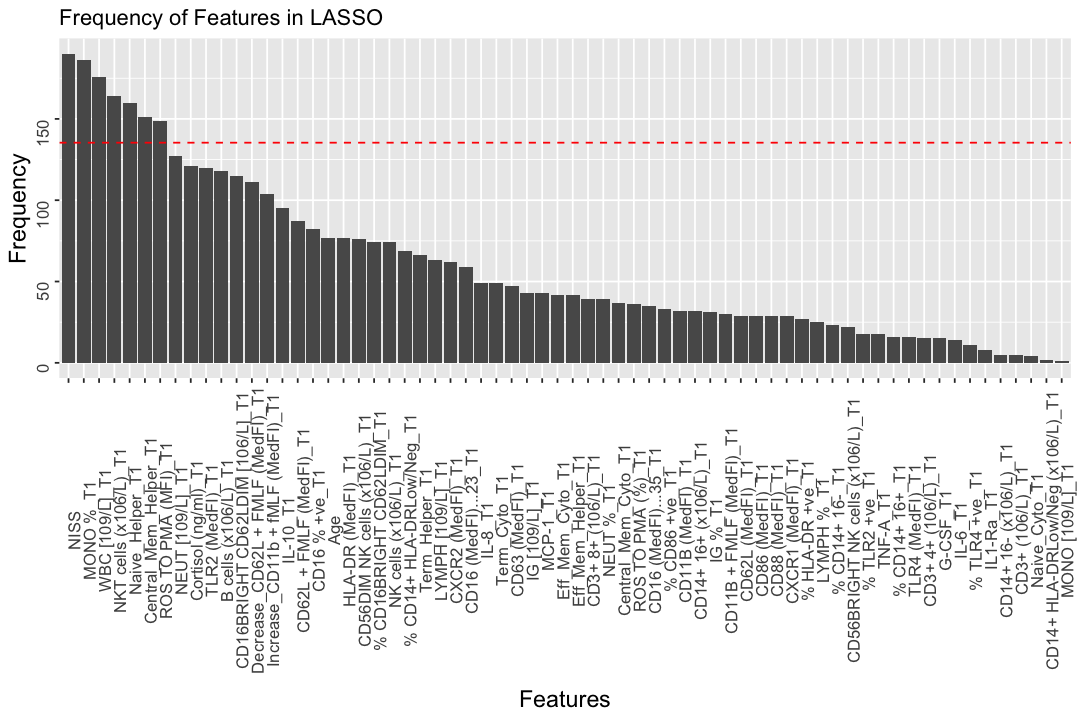

In [14]:
m <- count(see2EN, All)
head(m)
m <- m[-1,]

Final_EN <- m[order(-m$n),]

names(Final_EN) <- c("All","n")

QuantileEN <- data.frame(Quant= quantile(Final_EN$n))

ThreshEN <- mean(as.numeric(c(QuantileEN$Quant[4], QuantileEN$Quant[5])))

Final_EN1<-filter(Final_EN,n > ThreshEN) 

head(Final_EN1)


Final_EN$All <- factor(Final_EN$All, levels = Final_EN$All[order(-Final_EN$n)]) #plot in a bar graph the frequencies of ocurrance of the betas and order from highest to smalles

options(repr.plot.width = 9, repr.plot.height = 6)
Final_EN$All<-gsub("`","",Final_EN$All)
plot3 <- print(ggplot(Final_EN, aes(reorder(All,-n),n))+geom_bar(stat = "identity")+theme(axis.text=element_text(angle = 90,size=10),axis.title=element_text(size=14),strip.text.x = element_text(size = 14, colour = "black"), axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="Features",y="Frequency")+geom_hline(yintercept=ThreshEN, linetype="dashed", color = "red")+ggtitle("Frequency of Features in LASSO"))




All                     n  
1 NISS                    183
2 `MONO %_T1`             174
3 `WBC [109/L]_T1`        135
4 Naive_Helper_T1         133
5 `NKT cells (x106/L)_T1` 122

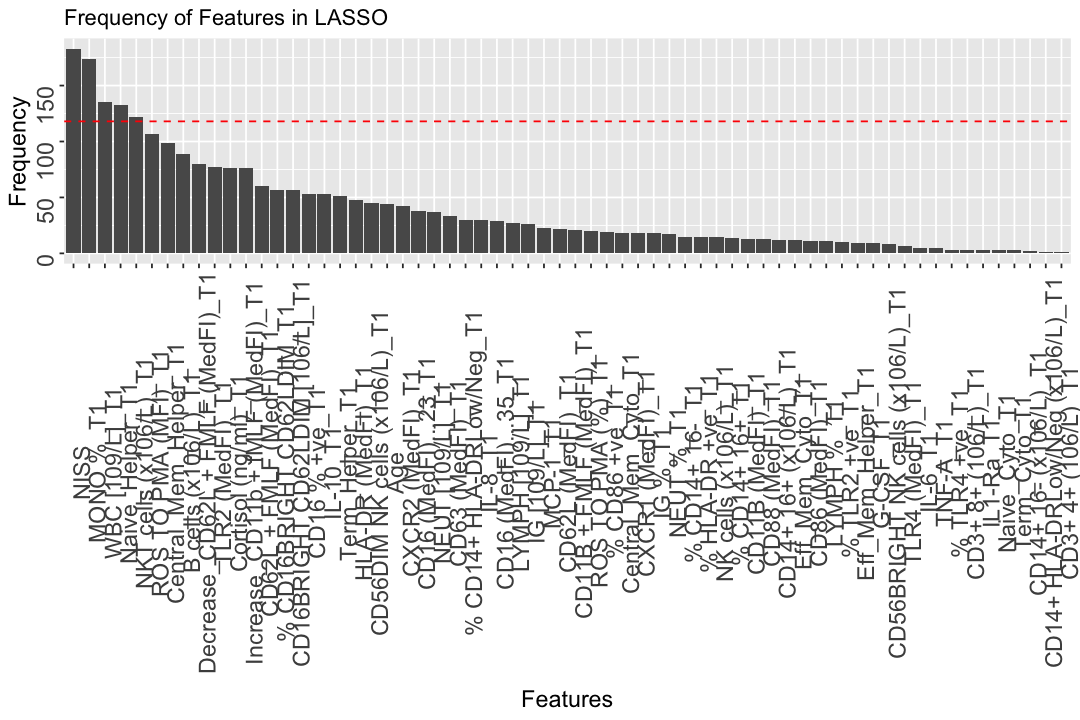

In [15]:
m <- count(see2, All)

m <- m[-1,]

Final_LASSO <- m[order(-m$n),]

names(Final_LASSO) <- c("All","n")

Quantile <- data.frame(Quant= quantile(Final_LASSO$n))

Thresh <- mean(as.numeric(c(Quantile$Quant[4], Quantile$Quant[5])))

Final_LASSO1<-filter(Final_LASSO,n > Thresh) 

head(Final_LASSO1)

Final_LASSO$All <- factor(Final_LASSO$All, levels = Final_LASSO$All[order(-Final_LASSO$n)]) #plot in a bar graph the frequencies of ocurrance of the betas and order from highest to smalles
 


#str(Final_LASSO)
options(repr.plot.width = 9, repr.plot.height = 6)
Final_LASSO$All<-gsub("`","",Final_LASSO$All)
plot4 <- print(ggplot(Final_LASSO, aes(reorder(All,-n),n))+geom_bar(stat = "identity")+theme(axis.text=element_text(angle = 90,size=11),axis.title=element_text(size=13),strip.text.x = element_text(size = 13, colour = "black"), axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="Features",y="Frequency")+geom_hline(yintercept=Thresh, linetype="dashed", color = "red")+ggtitle("Frequency of Features in LASSO")+
 theme(axis.text=element_text(size=14),axis.title=element_text(size=14),legend.text=element_text(size=11)))
  



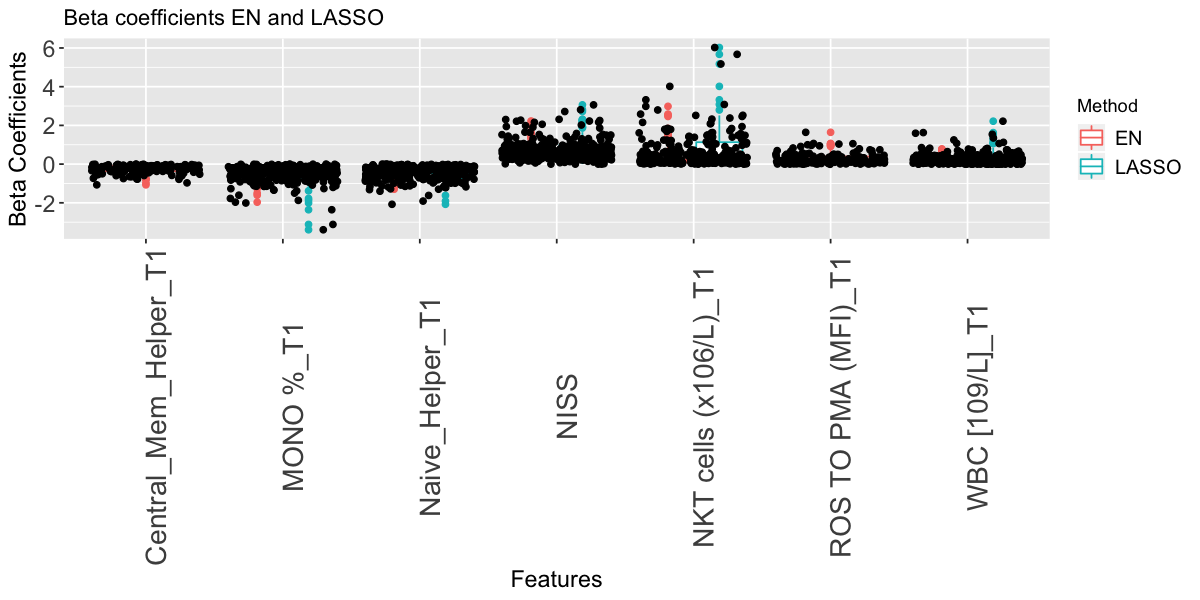

In [16]:
  Boxplot1 <- BetasTodo[BetasTodo$Features %in% Final_EN1$All,] #see which features appear in the filtered features (80%) and obtain the coefficients associated. 
  Boxplot1["Method"]<-as.factor("EN")
  
  Boxplot2 <- BetasTodoL[BetasTodoL$Features %in% Final_LASSO1$All,]
  Boxplot2["Method"] <- as.factor("LASSO")
  
  Fin_Boxplot <- rbind(Boxplot1,Boxplot2) #Unite both boxplots LASSO and EN 
  Fin_Boxplot$Features<-gsub("`","",Fin_Boxplot$Features)
  
  plot1 <- ggplot(Fin_Boxplot,aes(Fin_Boxplot$Features,Fin_Boxplot$Coefficients))+geom_boxplot(aes(color=Method))+geom_jitter()+theme(axis.text.x = element_text(size=17, angle=90))+ggtitle("Beta coefficients EN and LASSO")+ labs(x = "Features",y="Beta Coefficients")+
 theme(axis.text=element_text(size=14),axis.title=element_text(size=14),legend.text=element_text(size=12))
  
  options(repr.plot.width = 10, repr.plot.height = 5)
  grid.arrange(plot1)

  options(repr.plot.width = 15, repr.plot.height = 20)
 
  pdf("/Users/laura/Desktop/FinalPaper/HistogramBetas.pdf",width=11, height=12)

  #options(repr.plot.width = 15, repr.plot.height = 15)

  grid.arrange(plot4,plot1,nrow=2)

  graphics.off()


  All_Feat <- rbind(Final_LASSO1,Final_EN1)
  All_Feat2 <- unique(All_Feat$All) #select the filtered betas in both. 
  Betas_select <- All2[,intersect(gsub("`", "", All_Feat2), colnames(All2))]
  Betas_select["Label"] <- All2$Label
  Betas_select2 <- Betas_select
 
## Selected Features 
  




NISS       MONO %_T1   WBC [109/L]_T1 Naive_Helper_T1 NKT cells (x106/L)_T1
1 -1.3838429  1.60389375  2.1290636     -0.4111279      -0.54670078          
2 -0.8027674 -1.02732594 -0.9361674      0.1467287       0.70522307          
3 -1.0668926 -0.58878932 -0.7715913     -1.0454648      -0.54670078          
4 -1.3310178 -0.28181369 -0.3772942      0.2547009      -0.54670078          
5 -0.1688669  0.02516194  0.6324491     -1.0454648      -0.54670078          
6 -1.3838429  0.33213757 -1.0287415     -0.2469201      -0.05093893          
  Central_Mem_Helper_T1 ROS TO PMA (MFI)_T1 Label
1 -0.6273838             0.4038579          N    
2 -0.6189976             0.3626445          Y    
3 -1.0886246            -1.0514807          N    
4  0.7395664            -0.5232609          N    
5 -1.0886246             0.5771829          Y    
6 -0.1829153             1.8589499          N

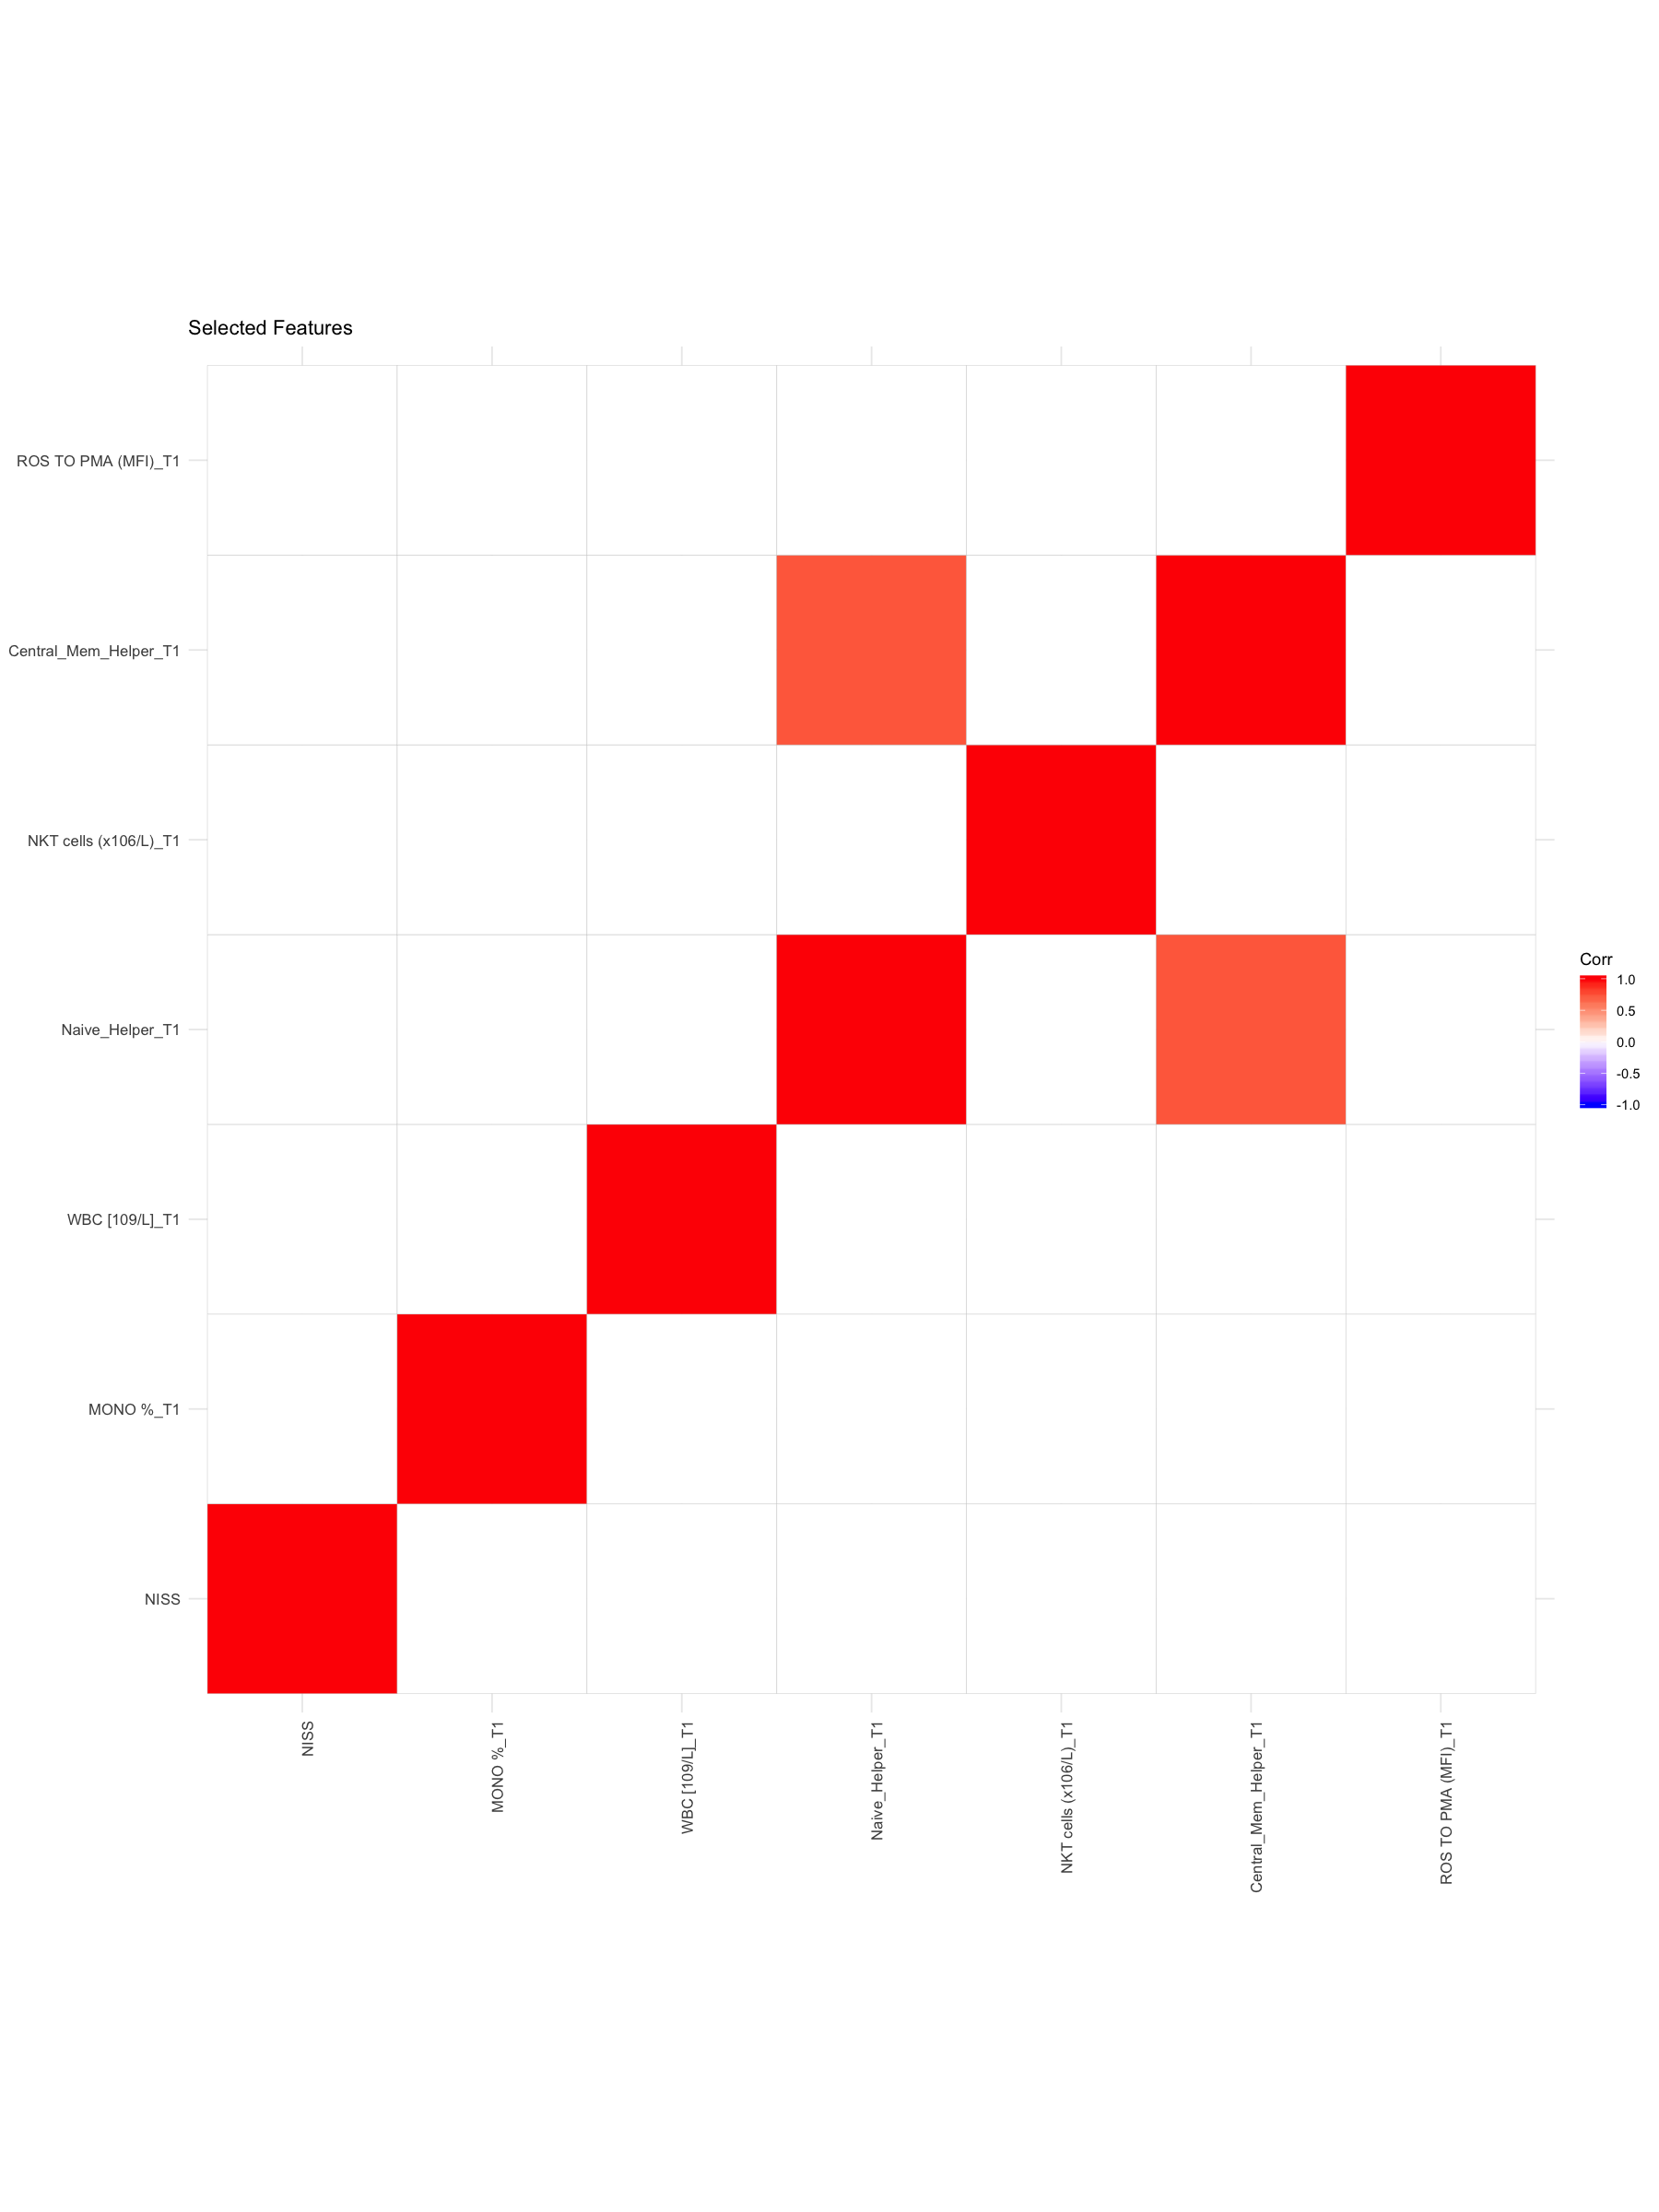

In [17]:
head(Betas_select)
Subset <- Betas_select[,-c(length(names(Betas_select)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))



In [18]:

NumVar <- length(Betas_select)
names <-colnames(Betas_select)
names1 <- as.character(names)

names1 <- strsplit(names1,", ")
names <- as.data.frame(names1)

N <- 1000

multipleAUC<-matrix(rnorm(2),1,N) 
  multipleAUCR<-matrix(rnorm(2),1,N) 
  multipleAUCNB<-matrix(rnorm(2),1,N) 
  multipleAUCNBR<-matrix(rnorm(2),1,N) 
  
  multipleROC<-matrix(as.list(rnorm(2)),1,N)  
  multipleROCR<-matrix(as.list(rnorm(2)),1,N)  
  multipleNBROC<-matrix(as.list(rnorm(2)),1,N) 
  multipleNBROCR<-matrix(as.list(rnorm(2)),1,N) 
  
  singleROC<-list()
  doubleROC<-list()
  singleROCR<-list()
  doubleROCR<-list()
  
  doublePlus<-list()
  singlePlus<-list()
  
  singleAUC<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUC<-matrix(rnorm(2),(NumVar-1),N) 
  singleAUCR<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUCR<-matrix(rnorm(2),(NumVar-1),N)
  
  doubleAUCSVMR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVM<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNBR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNB<-matrix(rnorm(2),(NumVar-1),N) 
  
  MatsingleROC<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatsingleROCR<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatdoubleROC<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  MatdoubleROCR<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  
  MatsinglePlus<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlus<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  MatsinglePlusR<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlusR<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  multiplePlus<-matrix(as.list(rnorm(2)),1,N)
  multiplePlusR<-matrix(as.list(rnorm(2)),1,N)

set.seed(132)

source("/Users/laura/Documents/PhD/R/PipelineAll/FunctionsAUC.R")

print("loaded")

[1] "loaded"


In [21]:
for (j in 1:N){ #N different measurements of AUC values, mean done at the end. 
  
  smp_size <- floor(0.65 * nrow(Betas_select2))
  #set.seed(907)
  train_ind <- sample(seq_len(nrow(Betas_select2)), size = smp_size)
  
  # Training set
  train <- Betas_select2[train_ind, ]
  
  # Test set
  test <- Betas_select2[-train_ind, ]
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]
  
  multipleAUCNB[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUC[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROC[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  
  multipleROC[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  multiplePlus[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  #separate
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUC[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROC[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlus[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROC[,j] <- matrix(singleROC)
  
  
  #Null Hypothesis #### 
  
  
  # Training set
  
  train$Label <- sample(train$Label)
  test$Label <- sample(test$Label)
  #Permuted data, will make sure that are models are really valid as randomizing the label should yield around 0.5 AUC values. The same testing and training arrangements for the real per model are used. 
  
  # Test set
  
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]

  
  multipleAUCNBR[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUCR[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  multiplePlusR[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROCR[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  multipleROCR[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUCR[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROCR[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlusR[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROCR[,j] <- matrix(singleROCR)
  
    print(j)
}



ERROR: Error in parse(text = x, srcfile = src): <text>:89:1: inesperado ';'
88: 
89: ;
    ^


In [22]:
#Remember to set something like this woth Folder saying FigAUC

WD <- paste(path.expand("~"), "/Documents/PhD/R/PipelineAll/", sep="")  #change this 
setwd(WD)

dir.create(file.path(WD, "FigAUC"), showWarnings = FALSE)

trial <- NULL
test_name <- "Laura"

singleAUC <- as.data.frame(singleAUC)
singleAUC <- mutate(singleAUC, Means=rowMeans(singleAUC))
row.names(singleAUC) <- names(xtrain)

singleAUCR <- as.data.frame(singleAUCR)
singleAUCR <- mutate(singleAUCR, Means=rowMeans(singleAUCR))
row.names(singleAUCR) <- names(xtrain)

multipleAUCR <- as.data.frame(multipleAUCR)
multipleAUCR["Means"] <- rowMeans(as.data.frame(multipleAUCR))

multipleAUC <- as.data.frame(multipleAUC)
multipleAUC["Means"] <- rowMeans(as.data.frame(multipleAUC))

Final <- data.frame(Multi=t(multipleAUC),MultiRand=t(multipleAUCR) )
FinalMeans <- data.frame(Multi=multipleAUC$Means,MultiRand=multipleAUCR$Means )

MonoSingle <- plotAUCSingle(singleAUC, singleAUCR,NumVar,test_name)

names <-names(Betas_select2)
names1 <-as.character(names)
names1 <-strsplit(names1,", ")
names1 <-as.data.frame(names1)

MonoMultiple <- plotAUCMultiple(multipleAUC, multipleAUCR,2,test_name)

Total <- data.frame(Single=singleAUC$Means,SingleRandom=singleAUCR$Means)
m <-length(names)
rownames(Total) <- colnames(Betas_select)[1:(length(names)-1)]

summary(MonoMultiple)
head(singleAUC)
head(Final)



      Mono                  Label     
 Min.   :0.1880   Model        :1000  
 1st Qu.:0.4959   Permuted data:1000  
 Median :0.6964                       
 Mean   :0.6705                       
 3rd Qu.:0.8543                       
 Max.   :1.0000                       

V1        V2        V3        V4        V5       
NISS                  0.8250000 0.6125000 0.6952381 0.7777778 0.7589286
MONO %_T1             0.7833333 0.7458333 0.6714286 0.7777778 0.6919643
WBC [109/L]_T1        0.5375000 0.7750000 0.7333333 0.5641026 0.5535714
Naive_Helper_T1       0.5916667 0.5916667 0.8666667 0.7051282 0.4776786
NKT cells (x106/L)_T1 0.4208333 0.5833333 0.5904762 0.7179487 0.6741071
Central_Mem_Helper_T1 0.6000000 0.6333333 0.8095238 0.7222222 0.5133929
                      V6        V7        V8        V9        V10       ⋯
NISS                  0.7272727 0.6239669 0.8833333 0.6000000 0.6750000 ⋯
MONO %_T1             0.6033058 0.5661157 0.5500000 0.8125000 0.8083333 ⋯
WBC [109/L]_T1        0.6570248 0.6859504 0.7375000 0.6166667 0.7541667 ⋯
Naive_Helper_T1       0.7190083 0.6942149 0.4416667 0.7583333 0.5708333 ⋯
NKT cells (x106/L)_T1 0.5661157 0.6074380 0.6250000 0.3000000 0.5291667 ⋯
Central_Mem_Helper_T1 0.6694215 0.7190083 0.4833333 0.1916667 0.5625000 ⋯
                      V992      V993      V994      V995      V996     
NISS                  0.7458333 0.8677686 0.9196429 0.8958333 0.6083333
MONO %_T1             0.6625000 0.5454545 0.5401786 0.8291667 0.7583333
WBC [109/L]_T1        0.6541667 0.6363636 0.9375000 0.6500000 0.6750000
Naive_Helper_T1       0.5250000 0.6280992 0.4464286 0.7583333 0.6916667
NKT cells (x106/L)_T1 0.6750000 0.7603306 0.6830357 0.4875000 0.4666667
Central_Mem_Helper_T1 0.5083333 0.6611570 0.5357143 0.7000000 0.6000000
                      V997      V998      V999      V1000     Means    
NISS                  0.8928571 0.7375000 0.8541667 0.6694215 0.7185895
MONO %_T1             0.6964286 0.6291667 0.6416667 0.6735537 0.7149013
WBC [109/L]_T1        0.6919643 0.6833333 0.6666667 0.6570248 0.6788817
Naive_Helper_T1       0.5535714 0.6125000 0.7083333 0.6528926 0.6393363
NKT cells (x106/L)_T1 0.4955357 0.6166667 0.5500000 0.5785124 0.5455904
Central_Mem_Helper_T1 0.4017857 0.7125000 0.6833333 0.6115702 0.6325931

Multi     MultiRand
V1 0.8666667 0.4500000
V2 0.7333333 0.4500000
V3 0.9619048 0.6761905
V4 0.9059829 0.6923077
V5 0.8125000 0.5357143
V6 0.8264463 0.4545455

                           Real Permuted_Data                 Names
NISS                  0.7185895     0.4967129                  NISS
MONO %_T1             0.7149013     0.5029701             MONO %_T1
WBC [109/L]_T1        0.6788817     0.4938493        WBC [109/L]_T1
Naive_Helper_T1       0.6393363     0.4959632       Naive_Helper_T1
NKT cells (x106/L)_T1 0.5455904     0.5025888 NKT cells (x106/L)_T1
Central_Mem_Helper_T1 0.6325931     0.5032089 Central_Mem_Helper_T1
ROS TO PMA (MFI)_T1   0.6107661     0.5061690   ROS TO PMA (MFI)_T1
Multivariate          0.8404963     0.5005450          Multivariate


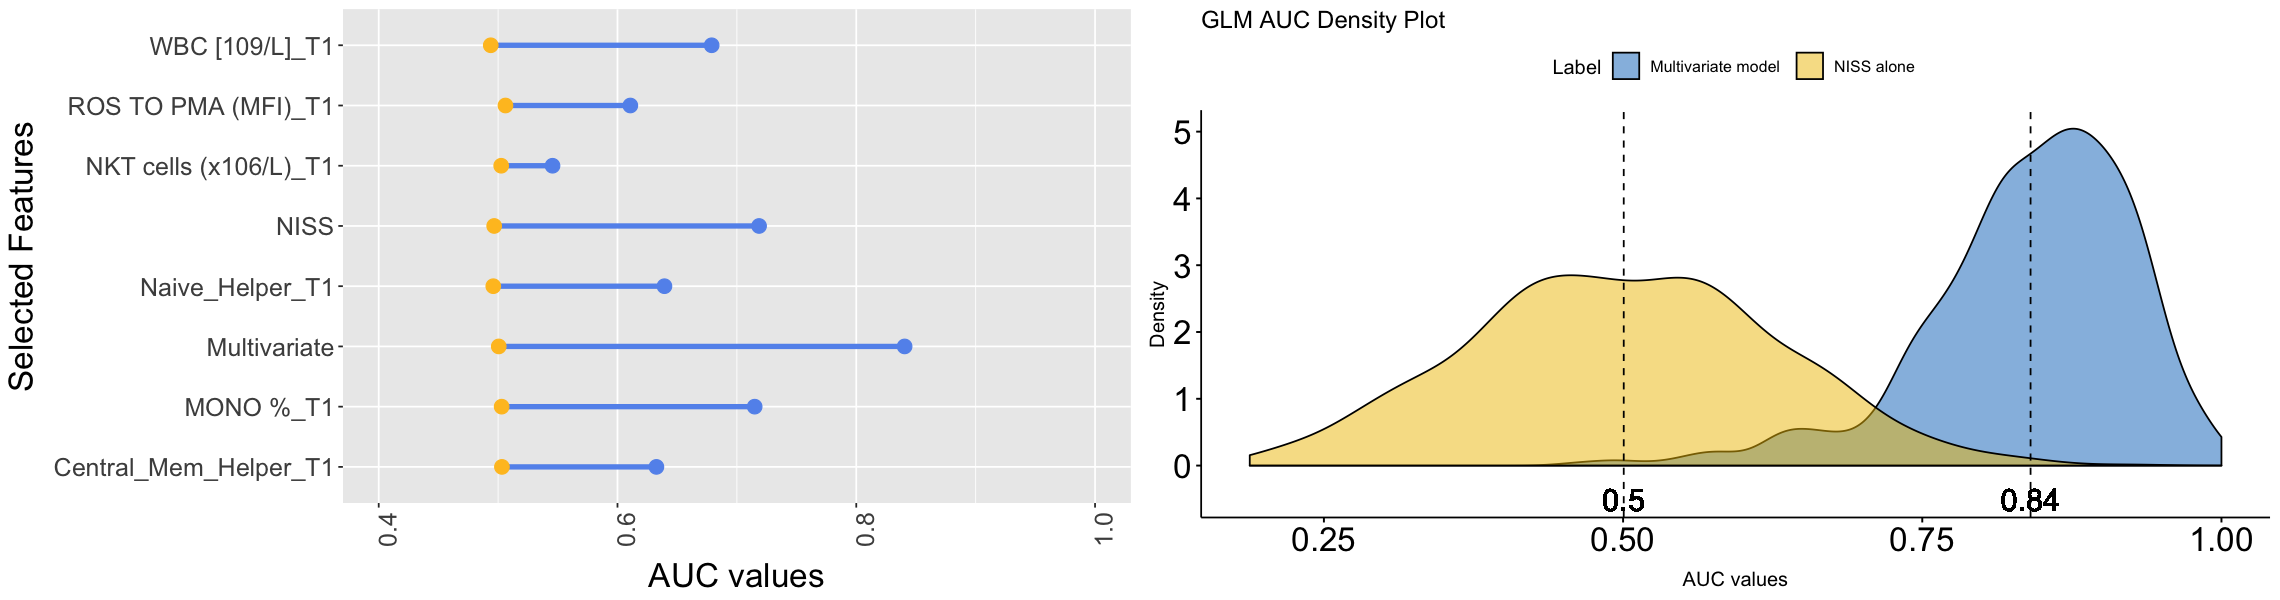

In [23]:
#Plots

MeansMultiple <- FinalMeans
MeansSingle <- Total[,c(1,2)]


colnames(MeansSingle) <- c("Real", "Permuted_Data")
Total <- rbind(MeansSingle, Multivariate=data.frame(Real=MeansMultiple$Multi,Permuted_Data=MeansMultiple$MultiRand))
Total["Names"]<- rownames(Total)

print(Total)

plot1 <- ggplot(Total, aes(y=Names, x=Permuted_Data,xend=Real))+geom_dumbbell(color="cornflowerblue", size=1.5, point.colour.l="goldenrod1")+theme(axis.text.x = element_text(angle = 90), axis.text=element_text(size=15),axis.title=element_text(size=20),strip.text.x = element_text(size = 8, colour = "black"),axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Selected Features")+xlim(0.4,1)
saveRDS(plot1, paste("Results/",test_name, "_Finalplot.rds"))


#multipleAUCR <- singleAUC[4,]
#row.names(multipleAUCR) <- NULL

val <- 2

Meanq <- data.frame(multipleAUC$Means,multipleAUCR$Means)
  MA <- data.frame(Mono=t(multipleAUC[1:dim(multipleAUC)[2]-1]))
 
  MAR<-data.frame(Mono=t(multipleAUCR[1:dim(multipleAUCR)[2]-1]))
 
  MA["Label"]<-as.factor(c(rep("Multivariate model",dim(MA)[1])))
  MAR["Label"]<-as.factor(c(rep("NISS alone",dim(MAR)[1])))
  
  Mono<-rbind(MA,MAR)
  
pp <-ggdensity(Mono, x = "Mono", fill = "Label", palette = "jco")+geom_vline(xintercept=Meanq[1,1],linetype = 2,color="black",show.legend = TRUE)+
    labs(title= paste("GLM AUC Density Plot"),y="Density",x="AUC values")+
    geom_text(aes(x=as.numeric(Meanq[1,1]),y=-0.5,label=signif(Meanq[1,1], digits = 2)),size=6.5)+
    geom_text(aes(x=as.numeric(Meanq[1,2]),y=-0.5,label=signif(Meanq[1,2], digits = 2)),size=6.5)
  
plot2 <- pp+geom_vline(xintercept=Meanq[1,2],linetype = 2,color="black",show.legend = TRUE)+theme(axis.text=element_text(size=20),axis.title=element_text(size=12),strip.text.x = element_text(size = 12, colour = "black"),
  axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Density")


options(repr.plot.width = 19, repr.plot.height = 5)

#pdf("/Users/laura/Desktop/FinalPaper/DensityandDumbellFinalT1NISS.pdf",width=10, height=5)

save5 <- grid.arrange(arrangeGrob(plot1,plot2, ncol=2), ncol=1)
#graphics.off()

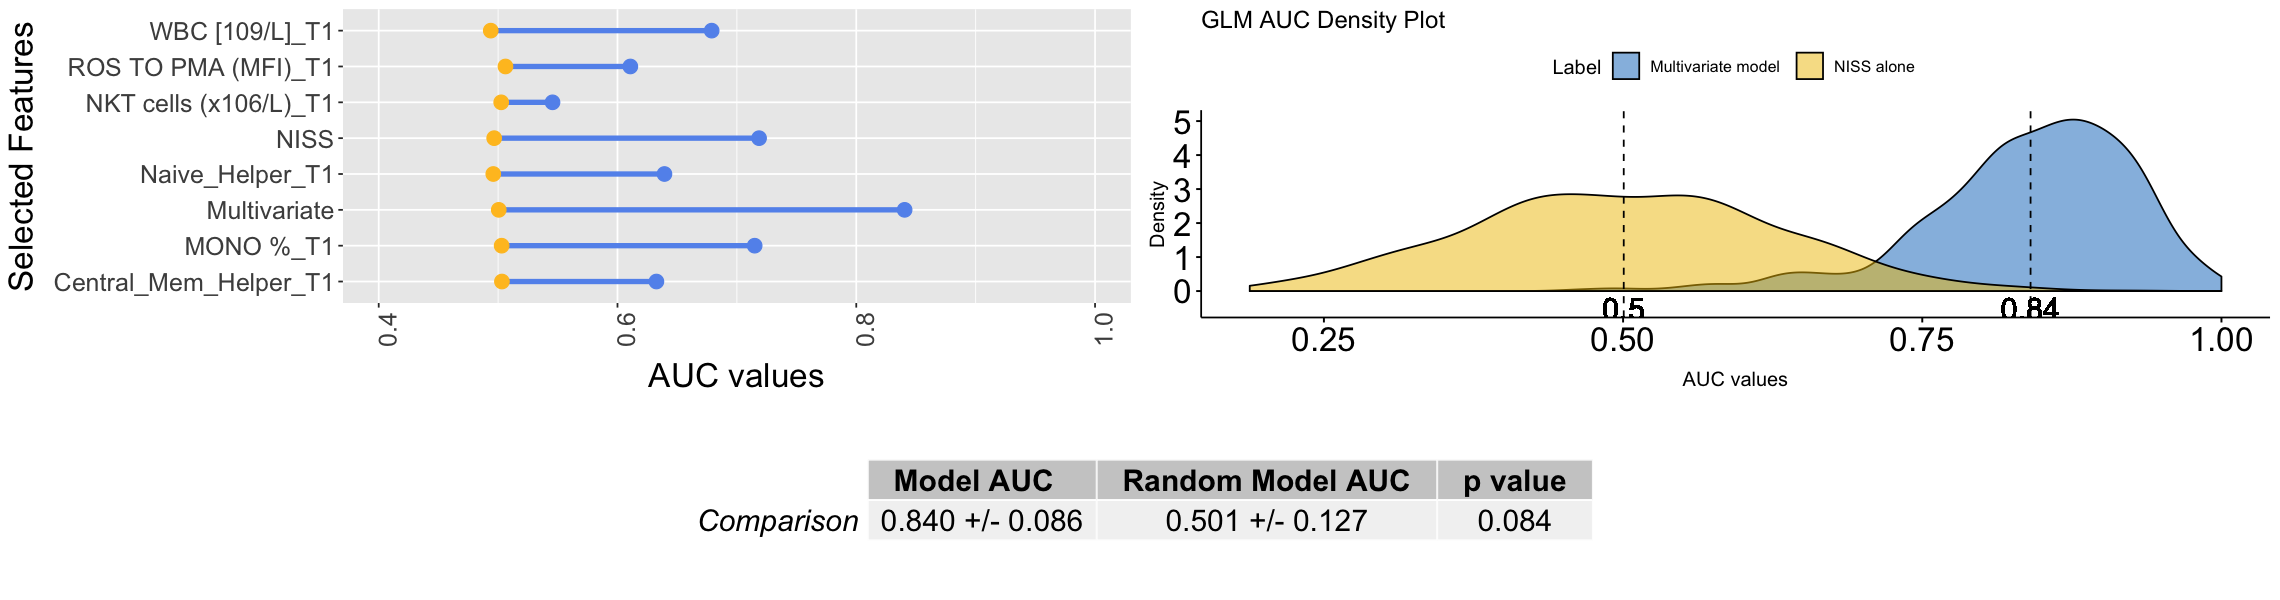

In [24]:
dd<- data.frame(Random=as.numeric(multipleAUCR[1,]),Normal=as.numeric(multipleAUC[1,]))
ddsd <- format(round(sd(dd$Random), 3), nsmall = 3)
ddsd2 <- format(round(sd(dd$Normal), 3), nsmall = 3)

count2 <- 0
count <- list()
gg <- 0 
ss <- 0


for (i in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
  ss <- ss+1 
  for (j in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
    gg <- gg+1
    if (dd$Random[i] > dd$Normal[j]){
      count2 <- count2 + 1
      
    }
  }
  count[i] <- count2
  count2 <- 0
}

s <- data.frame(table(as.numeric(count)))
pval <- length(s$Var1)/length(as.numeric(singleAUC[4,]))
pval <- format(round(pval, 3), nsmall = 3)

MeansMultiple$Multi <- format(round(as.numeric(MeansMultiple$Multi), 3), nsmall = 3)
MeansMultiple$MultiRand <- format(round(as.numeric(MeansMultiple$MultiRand), 3), nsmall = 3)



FinalVal <- paste(MeansMultiple$Multi,"+/-",ddsd2)
FinalValRand <- paste(MeansMultiple$MultiRand,"+/-",ddsd)
FinalTable<- data.frame(FinalVal,FinalValRand,pval)
rownames(FinalTable) <- c("Comparison")
names(FinalTable) <- c("  Model AUC    ","  Random Model AUC  ","  p value  ")


mytheme <- gridExtra::ttheme_default(
  core = list(fg_params=list(cex = 1.5)),
  colhead = list(fg_params=list(cex = 1.5)),
  rowhead = list(fg_params=list(cex = 1.5)))

tbl <- tableGrob(FinalTable, theme=mytheme)

#pdf("/Users/laura/Desktop/FinalPaper/LauraFinalT1NISS.pdf",width=10, height=6)

grid.arrange(save5, tbl,
             nrow=2,
             as.table=TRUE,
             heights=c(2,1))

#graphics.off()